In [ ]:
!pip install opencv-python
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 44.8 MB/s eta 0:00:00


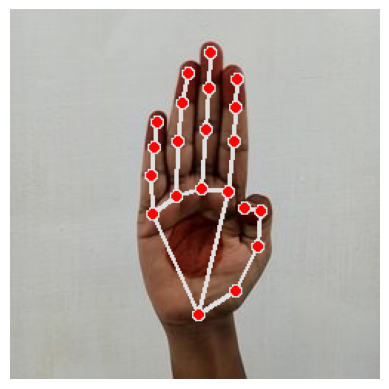

Two-handed
Number of hand landmarks: 21
Angles between fingers:
THUMB - INDEX: -93.76858831849165 degrees
THUMB - MIDDLE: -102.67931970524565 degrees
THUMB - RING: -112.98895341239029 degrees
THUMB - PINKY: -135.58575004704852 degrees
INDEX - MIDDLE: -135.74205758980608 degrees
INDEX - RING: -172.96080090963147 degrees
INDEX - PINKY: 151.5849473302429 degrees
MIDDLE - RING: 138.94938926101514 degrees
MIDDLE - PINKY: 127.74276733414175 degrees
RING - PINKY: 121.97692351685936 degrees


In [ ]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import math

# Load the image
image = cv2.imread("/content/drive/MyDrive/images/pataka_0.jpg")

# Convert the image to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a Mediapipe hands object
hands = mp.solutions.hands.Hands(static_image_mode=True, max_num_hands=2)

# Process the image to find hand landmarks
results = hands.process(image_rgb)

# Initialize hand landmark count
hand_landmark_count = 0

# Check if hand landmarks are detected
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        # Count the number of hand landmarks
        num_landmarks = len(hand_landmarks.landmark)
        hand_landmark_count += num_landmarks

        # Draw landmarks on the image
        annotated_image = image.copy()
        mp.solutions.drawing_utils.draw_landmarks(
            annotated_image, hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)

        # Convert the image back to BGR format for plotting with matplotlib
        annotated_image_bgr = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)

        # Plot the image with landmarks
        plt.imshow(annotated_image_bgr)
        plt.axis('off')
        plt.show()

# Determine if it is one hand or two-handed
if hand_landmark_count < 21:
    print("One hand")
else:
    print("Two-handed")

# Print the number of hand landmarks
print("Number of hand landmarks:", hand_landmark_count)

# Calculate the angles between the five fingers
if hand_landmark_count >= 21:
    finger_names = ["THUMB", "INDEX", "MIDDLE", "RING", "PINKY"]
    angles = []
    for hand_landmarks in results.multi_hand_landmarks:
        finger_points = [hand_landmarks.landmark[mp.solutions.hands.HandLandmark.THUMB_TIP],
                         hand_landmarks.landmark[mp.solutions.hands.HandLandmark.INDEX_FINGER_TIP],
                         hand_landmarks.landmark[mp.solutions.hands.HandLandmark.MIDDLE_FINGER_TIP],
                         hand_landmarks.landmark[mp.solutions.hands.HandLandmark.RING_FINGER_TIP],
                         hand_landmarks.landmark[mp.solutions.hands.HandLandmark.PINKY_TIP]]

        # Calculate the angles between the fingers
        for i in range(len(finger_names)):
            for j in range(i + 1, len(finger_names)):
                angle_rad = math.atan2(finger_points[j].y - finger_points[i].y,
                                       finger_points[j].x - finger_points[i].x)
                angle_deg = math.degrees(angle_rad)
                angles.append((finger_names[i], finger_names[j], angle_deg))

    # Print the angles between the fingers
    print("Angles between fingers:")
    for angle in angles:
        print(f"{angle[0]} - {angle[1]}: {angle[2]} degrees")


Angles between fingers:
THUMB - INDEX: -63.043731799245066 degrees
THUMB - MIDDLE: -72.96422184365969 degrees
THUMB - RING: -83.70035629032488 degrees
THUMB - PINKY: -94.13035069848979 degrees
INDEX - MIDDLE: -86.20654438478975 degrees
INDEX - RING: -107.94878416388069 degrees
INDEX - PINKY: -117.5900904627981 degrees
MIDDLE - RING: -168.02331065554807 degrees
MIDDLE - PINKY: -148.47083723916856 degrees
RING - PINKY: -135.31238496534274 degrees


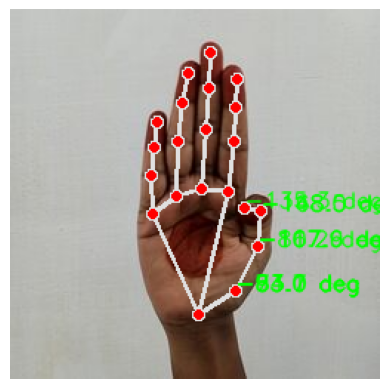

Two-handed
Number of hand landmarks: 21


In [ ]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import math

# Load the image
image = cv2.imread("/content/drive/MyDrive/images/pataka_0.jpg")

# Convert the image to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a Mediapipe hands object
hands = mp.solutions.hands.Hands(static_image_mode=True, max_num_hands=2)

# Process the image to find hand landmarks
results = hands.process(image_rgb)

# Initialize hand landmark count
hand_landmark_count = 0

# Check if hand landmarks are detected
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        # Count the number of hand landmarks
        num_landmarks = len(hand_landmarks.landmark)
        hand_landmark_count += num_landmarks

        # Draw landmarks on the image
        annotated_image = image.copy()
        mp.solutions.drawing_utils.draw_landmarks(
            annotated_image, hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)

        # Calculate the angles between the fingers
        if num_landmarks >= 21:
            finger_names = ["THUMB", "INDEX", "MIDDLE", "RING", "PINKY"]
            angles = []
            for i in range(len(finger_names)):
                for j in range(i + 1, len(finger_names)):
                    p1 = hand_landmarks.landmark[mp.solutions.hands.HandLandmark(i + 1)]
                    p2 = hand_landmarks.landmark[mp.solutions.hands.HandLandmark(j + 1)]
                    angle_rad = math.atan2(p2.y - p1.y, p2.x - p1.x)
                    angle_deg = math.degrees(angle_rad)
                    angles.append((finger_names[i], finger_names[j], angle_deg))
                    cv2.putText(annotated_image, f"{angle_deg:.1f} deg",
                                (int(p1.x * image.shape[1]), int(p1.y * image.shape[0])),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

            # Print the angles between the fingers
            print("Angles between fingers:")
            for angle in angles:
                print(f"{angle[0]} - {angle[1]}: {angle[2]} degrees")

        # Convert the image back to BGR format for plotting with matplotlib
        annotated_image_bgr = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)

        # Plot the image with landmarks and angles
        plt.imshow(annotated_image_bgr)
        plt.axis('off')
        plt.show()

# Determine if it is one hand or two-handed
if hand_landmark_count < 21:
    print("One hand")
else:
    print("Two-handed")

# Print the number of hand landmarks
print("Number of hand landmarks:", hand_landmark_count)
